# 04 Data Analytics: Univariate Statistics

## Import libraries

In [102]:
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis, iqr
import statsmodels.api as sm # recommended import according to the docs
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
%matplotlib inline

## Dataset parameters

In [103]:
datasets_path = "data/"
delimiter = "\t"
filename = "PorositySample1"
extension = ".csv"

## Import PorositySample1

In [104]:
sample = pd.read_csv(
    datasets_path+filename+extension,
    sep=delimiter,
    header=0)

## Display some data

In [105]:
sample.head()

,Index,Porosity
0,1,0.15
1,2,0.11
2,3,0.11
3,4,0.02
4,5,0.11


## Summary Statistics

### Variable Porosity

In [106]:
display(sample['Porosity'].describe())
print(f"\nVariance: {round(sample.loc[:,'Porosity'].var(),6)}")
print(f"Skew: {round(skew(sample.loc[:,'Porosity']),6)}")
print(f"Kurtosis: {round(kurtosis(sample.loc[:,'Porosity']),6)}")

sample_iqr = iqr(sample.loc[:,'Porosity'])
print(f"\nIQR: {round(sample_iqr,6)}")
lower_fence = (np.percentile(sample['Porosity'], 25) - (sample_iqr * 1.5))
lower_fence = 0 if lower_fence < 0 else lower_fence
upper_fence = np.percentile(sample['Porosity'], 75) + (sample_iqr * 1.5)
print(f"Lower Fence: {round(lower_fence,6)}")
print(f"Upper Fence: {round(upper_fence,6)}")

print('\nOutliers')
lower_outliers = list(sample[sample['Porosity'] < lower_fence].Porosity)
upper_outliers = list(sample[sample['Porosity'] > upper_fence].Porosity)
print(f'Lower Outliers: {lower_outliers}')
print(f'Upper Outliers: {upper_outliers}')

count    50.000000
mean      0.125400
std       0.065472
min       0.000000
25%       0.072500
50%       0.120000
75%       0.180000
max       0.260000
Name: Porosity, dtype: float64


Variance: 0.004287
Skew: -0.022885
Kurtosis: -0.904548

IQR: 0.1075
Lower Fence: 0
Upper Fence: 0.34125

Outliers
Lower Outliers: []
Upper Outliers: []


## CDF

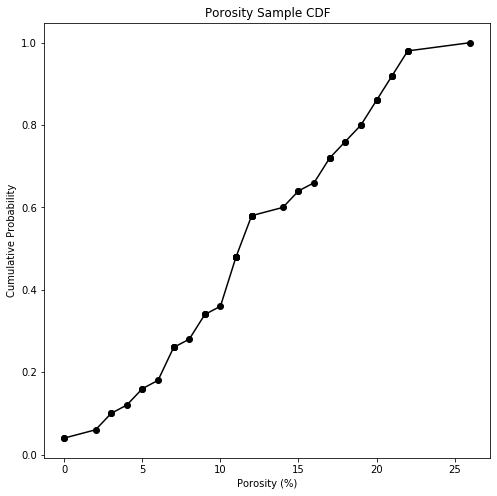

In [148]:
x = sample.sort_values(by='Porosity').Porosity
x = x * 100
ecdf = sm.distributions.ECDF(x)
y = ecdf(x)

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(x, y, marker='o', linestyle='-', color='k')
plt.title("Porosity Sample CDF")
plt.xlabel("Porosity (%)")
plt.ylabel("Cumulative Probability")
plt.show()